# General Idea

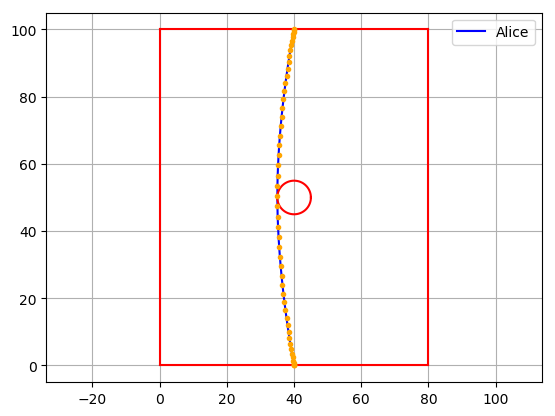

Optimal
Total Distance: 100.6268589535458
Total Acceleration: 1.3752809267626347e7
Start: [40, 0]
End: [40, 100]


In [5]:
using JuMP, PyPlot, Ipopt

# Define model, variables, constraints, objective
m = Model(solver=IpoptSolver(print_level=0))

time = 50
start = [40, 0]
finish = [40, 100]
circles = [ 40 50;]

r = 5

num_circles, dim = size(circles)

@variable(m, x_A[1:2, 1:time])
@variable(m, v_A[1:2, 1:time])
@variable(m, u_A[1:2, 1:time])

# x index on east/west, y index on north/south
@constraint(m, x_A[:, 1] .== start) # Robot's initial position
@constraint(m, v_A[:, 1] .== [0, 0]) # Robot's initial velocity 
@constraint(m, 0 .<= x_A[1, :] .<= 80   )
@constraint(m, 0 .<= x_A[2, :] .<= 101  )

setvalue(x_A[:, 25], [20, 50])

# Keep path away from obstacles defined by radii from circle center
for t in 1:time
    @NLconstraint(m, (x_A[1,t]-circles[1,1])^2 + (x_A[2,t]-circles[1,2])^2  >= (r)^2) 
end

# Dynamic equations
for t in 1:time-1
    @constraint(m, x_A[:, t+1] .== x_A[:, t] + (1/3600)*v_A[:, t]) # Alice's position    
    @constraint(m, v_A[:, t+1] .== v_A[:, t] + u_A[:, t]) # Alice's velocity
end

@constraint(m, x_A[:, time] .== finish) # final location
@constraint(m, v_A[:, time] .== [0,0]) # final velocity

@objective(m, Min, sum(u_A.^2)) # minimize total energy

# Solve
status = solve(m)
println(status)

d_tot_actual = 0
for t in 1:time-1
    d_tot_actual += sqrt( (getvalue(x_A[1,t+1])-getvalue(x_A[1,t]))^2 + (getvalue(x_A[2,t+1])-getvalue(x_A[2,t]))^2) 
end

println("Total Distance: ", d_tot_actual)

# Output
x_A = getvalue(x_A)
println("Total Acceleration: ", getobjectivevalue(m))
println("Start: ", start)
println("End: ", finish)

# Graph path
plot(x_A[1, :], x_A[2, :], color="blue", label="Alice")

# Plot circle
t = range(0,stop=2pi,length=100)         # parameter that traverses the circle
plot( circles[1,1] .+ r*cos.(t), circles[1,2] .+ r*sin.(t), color="red")  # plot circle radius r with center (x1, x2)

rightWally = range(0, stop=100, length = 100)
rightWallx = 0*rightWally
plot(rightWallx, rightWally, color="r")

leftWallx = 0*rightWally .+ 80
plot(leftWallx, rightWally, color="r")

bottomx = range(0, stop=80, length=10)
bottomy = 0*bottomx
topy = bottomy .+ 100
plot(bottomx, bottomy, color="r")
plot(bottomx, topy, color="r")

# Plot time steps
for t in 1:time
   plot(x_A[1, t], x_A[2, t], ".", color="orange")
end



# Formatting
axis("equal")                            # make x and y scales equal
grid("on")
legend()
;

# Minimum Distance

# Track

# Macaroni